### https://www.jianshu.com/p/1e444991bdf4

In [1]:
setwd('/import/DB/minidir/a.moth10/GC/')

In [3]:
load('./co.train-test.rda')

In [6]:
# 
library(e1071)

In [7]:
y_train = factor(y_train,levels = c(0 ,1 ))

In [ ]:
##############################################
########################################
#####################  
set.seed(123)
library(future)
plan("multisession",workers=80)

set.seed(1)
rfeControl = rfeControl(functions = caretFuncs,
                        method = "cv", # 
                        saveDetails = T, # 
                        number = 5, #
                        allowParallel = T # 
)

Profile=rfe(x=as.matrix(X_train) ,y=y_train,sizes = c(1:26),
            rfeControl =  rfeControl,
            methods="svmRadial")

Warning message:
"package 'future' was built under R version 4.2.3"

Attaching package: 'future'


The following object is masked from 'package:caret':

    cluster




In [15]:
Profile


Recursive feature selection

Outer resampling method: Cross-Validated (5 fold) 

Resampling performance over subset size:

 Variables Accuracy  Kappa AccuracySD KappaSD Selected
         1   0.5870 0.1737    0.04978 0.09861         
         2   0.6544 0.3079    0.05804 0.11614         
         3   0.7091 0.4173    0.04326 0.08809         
         4   0.7284 0.4561    0.05828 0.11738         
         5   0.7444 0.4883    0.03750 0.07533         
         6   0.7637 0.5271    0.04015 0.08058         
         7   0.7669 0.5337    0.04268 0.08562         
         8   0.7685 0.5370    0.02857 0.05770         
         9   0.7749 0.5497    0.03398 0.06857         
        10   0.7605 0.5209    0.04174 0.08396         
        11   0.7733 0.5465    0.04221 0.08504         
        12   0.7734 0.5467    0.03432 0.06936         
        13   0.7685 0.5370    0.04654 0.09375         
        14   0.7717 0.5432    0.03456 0.06983         
        15   0.7845 0.5689    0.02949 0.05944      

In [13]:
dim(X_train)

[1] 622  26

ERROR: Error in text.default(wmin.x, wmin.y, paste0("N=", wmin.x), pos = 2, col = 2): no coordinates were supplied


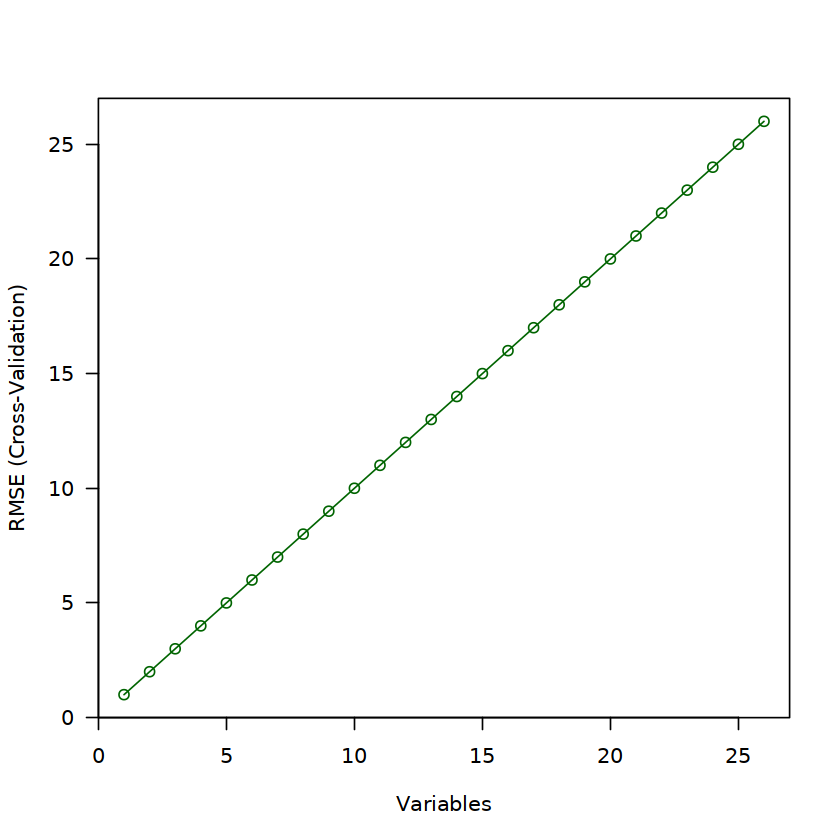

In [14]:
par(las=1)
x= Profile$results$Variables 
y =Profile$results$RMSE
plot(x, y, xlab="Variables", ylab="RMSE (Cross-Validation)", col="darkgreen") 
lines(x, y, col="darkgreen")
wmin=which.min(y) 
wmin.x=x[wmin] 
wmin.y=y[wmin]
points(wmin.x, wmin.y, col="blue", pch=16)
text(wmin.x, wmin.y, paste0('N=', wmin.x), pos=2, col=2)
featureGenes = Profile$optVariables

In [19]:
featureGenes =  Profile$optVariables

In [20]:
# 
save.image("SVM.res.co.RData")

In [21]:
y_train = factor(y_train,levels = c(0,1))
y_test = factor(y_test,levels = c(0,1))

X_train1 = X_train[,featureGenes]
X_test1 = X_test[,featureGenes]

# 
library(e1071)
 
# 
svm_model <- svm(y_train ~ ., data = X_train1, kernel = "radial")

y_pred <- predict(svm_model, X_test1);

X_train2 = cbind(y_train,X_train1)

# 
tune_result <- tune(svm, y_train ~ ., data = X_train2 , kernel = "radial",
                    ranges = list(cost = c(0.1, 1, 10), gamma = c(0.1, 1, 10)),probability = TRUE)
best_model <- tune_result$best.model

length(y_train)

predicted <- predict(best_model, X_test,  decision.values = TRUE,probability = TRUE)

table(predicted, y_test)

#
prob_estimates <- attr(predicted, "probabilities")#

[1] 622

         y_test
predicted   0   1
        0 170  43
        1  52 149

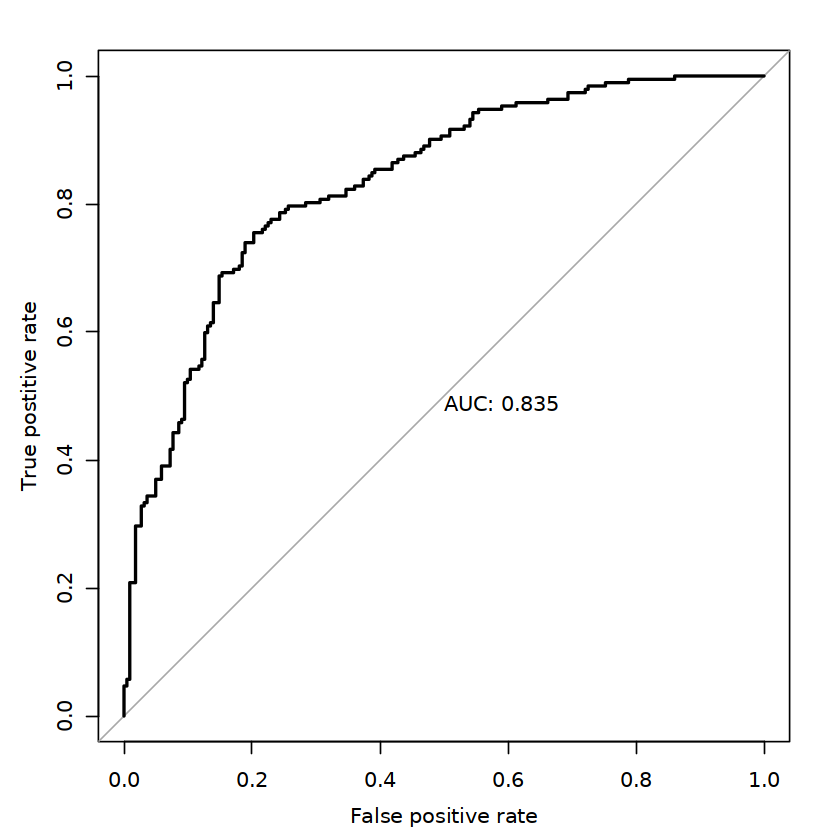

In [26]:
data_pre <- data.frame(prob = prob_estimates[,1],obs = y_test)
data_pre <- data_pre[order(data_pre$prob),]
modelroc <- roc(y_test,prob_estimates[,1], ,levels=c(0,1),direction="<",
                plot = TRUE, legacy.axes = TRUE, xlab = "False positive rate", 
                ylab = "True postitive rate",print.auc = TRUE)
# plot(1-modelroc$specificities, modelroc$sensitivities, type = "l", lty = 1, lwd = 2, xlab = "False positive rate", ylab = "True positive rate")
# #
# text(0.8,0.15, labels = 'AUC:0.9457', font = 1)

In [28]:
saveRDS(prob_estimates,file = 'model.SVM.co2.rds')

In [27]:
sv =  ifelse(prob_estimates[,1] > 0.5 ,1,0)
sv = factor(sv,levels = c(0,1))
confusionMatrix(sv, y_test,mode = "everything")

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 170  43
         1  52 149
                                         
               Accuracy : 0.7705         
                 95% CI : (0.727, 0.8102)
    No Information Rate : 0.5362         
    P-Value [Acc > NIR] : <2e-16         
                                         
                  Kappa : 0.5401         
                                         
 Mcnemar's Test P-Value : 0.4118         
                                         
            Sensitivity : 0.7658         
            Specificity : 0.7760         
         Pos Pred Value : 0.7981         
         Neg Pred Value : 0.7413         
              Precision : 0.7981         
                 Recall : 0.7658         
                     F1 : 0.7816         
             Prevalence : 0.5362         
         Detection Rate : 0.4106         
   Detection Prevalence : 0.5145         
      Balanced Accuracy : 0.7709         
        